# 手写数字识别

In [1]:
import tensorflow as tf

## 设置GPU

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu[0], True)

## 数据读取

In [3]:
import numpy as np
files = np.load('../data/mnist.npz')

In [4]:
X_train, X_test, y_train, y_test = files['x_train'], files['x_test'], files['y_train'], files['y_test']

In [5]:
print(f"X_train: {X_train.shape} | X_test: {X_test.shape} | y_train: {y_train.shape} | y_test: {y_test.shape}")

X_train: (60000, 28, 28) | X_test: (10000, 28, 28) | y_train: (60000,) | y_test: (10000,)


In [6]:
X_train, X_test = np.expand_dims(X_train, -1), np.expand_dims(X_test, -1)
print(f"X_train: {X_train.shape} | X_test: {X_test.shape}")

X_train: (60000, 28, 28, 1) | X_test: (10000, 28, 28, 1)


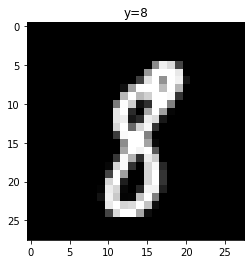

In [7]:
import matplotlib.pyplot as plt
plt.title('y=' + str(y_train[300]))
plt.imshow(X_train[300].reshape((28, 28)), cmap='gray')
plt.show()

## 模型的搭建

In [8]:
model = tf.keras.Sequential(name='LeNet5') # 搭建LeNet5神经网络框架

- filters: 卷积核的个数
- kernel_size: 卷积核的大小
- striders: 卷积核移动的步长
- input_shape: 输入到模型中的数据的尺寸，这个只在网络的第一层中指定
- activation: 非线性激活函数

In [9]:
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1), input_shape=(28, 28, 1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D()) # 最大池化层
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1), activation='relu')) # 卷积层
model.add(tf.keras.layers.MaxPool2D()) # 最大池化层
model.add(tf.keras.layers.Flatten()) # 展平层

In [10]:
model.add(tf.keras.layers.Dense(units=120, activation='relu')) # units: 全连接层的神经元数量
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [11]:
model.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10164

## 模型的编译

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=tf.keras.metrics.sparse_categorical_accuracy)

## 模型的训练

In [13]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.7012 - sparse_categorical_accuracy: 0.8726 - val_loss: 0.1720 - val_sparse_categorical_accuracy: 0.9499
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1386 - sparse_categorical_accuracy: 0.9589 - val_loss: 0.1133 - val_sparse_categorical_accuracy: 0.9655
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0904 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.0923 - val_sparse_categorical_accuracy: 0.9726
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0697 - sparse_categorical_accuracy: 0.9784 - val_loss: 0.0822 - val_sparse_categorical_accuracy: 0.9765
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0611 - sparse_categorical_accuracy: 0.9807 - val_loss: 0.0891 - val_sparse_categorical_accuracy: 0.9766
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0542 - sparse_categorica

## 模型的验证

In [14]:
model.evaluate(X_test, y_test) # [0]是损失, [1]是准确率

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - sparse_categorical_accuracy: 0.9826


[0.08862172812223434, 0.9825999736785889]

## 模型的测试

In [15]:
y_pred = model.predict(X_test[:10]).argmax(axis=1)
print(y_pred)
print(y_test[:10])

[7 2 1 0 4 1 4 9 5 9]
[7 2 1 0 4 1 4 9 5 9]


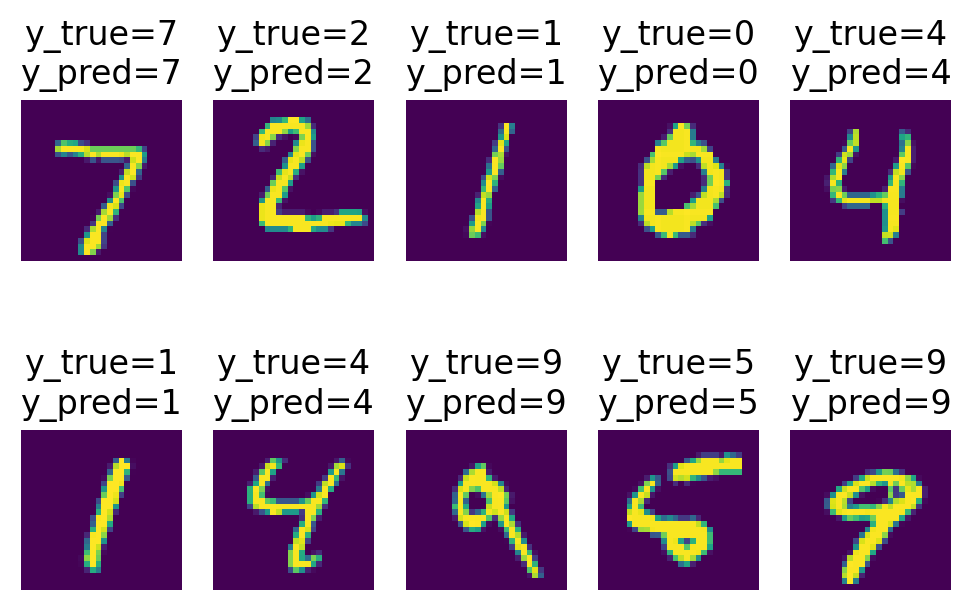

In [16]:
plt.figure(dpi=200)
for i in range(len(X_test[:10])):
    ax = plt.subplot(2, 5, i+1)
    ax.axis('off')
    ax.set_title(f'y_true={y_test[i]}\ny_pred={y_pred[i]}')
    ax.imshow(X_test[i].reshape((28, 28)))
plt.show()